In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
predictions = pd.read_csv('../Capstone/Data/top_30_article_forecasts.csv', sep=',')

In [11]:
predictions.head(1)

,Unnamed: 0,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,...,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30
0,706016001,1.636951,1.709564,1.751699,1.776149,1.790337,1.79857,1.803347,1.806119,1.807727,...,1.809948,1.809949,1.80995,1.809951,1.809951,1.809951,1.809951,1.809951,1.809951,1.809951


In [4]:
predictions.rename(columns={'Unnamed: 0': 'article_id'}, inplace=True)


In [31]:
predictions.to_csv('predictions_30_days.csv')

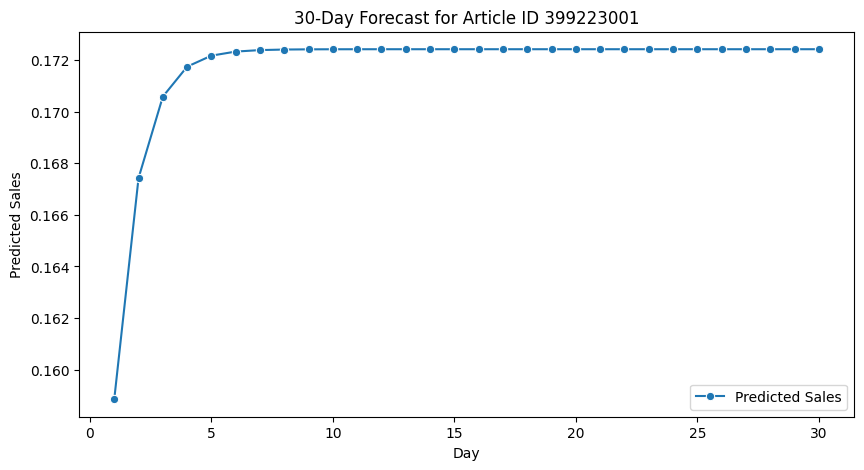

In [40]:
#LINE_PLOT_FOR_ARTICLE_ID

# Set the article ID you want to plot
article_id = predictions['article_id'].iloc[5]  # Replace with any specific article ID if desired
forecast_data = predictions[predictions['article_id'] == article_id].iloc[:, 1:]  # Select only day_1 to day_30

# Reset index for easier plotting
forecast_data = forecast_data.T.reset_index(drop=True)
forecast_data.columns = ['Predicted Sales']
forecast_data.index = range(1, 31)  # Set day numbers as index

plt.figure(figsize=(10, 5))
sns.lineplot(data=forecast_data, marker='o', color='b')
plt.title(f"30-Day Forecast for Article ID {article_id}")
plt.xlabel("Day")
plt.ylabel("Predicted Sales")
plt.show()


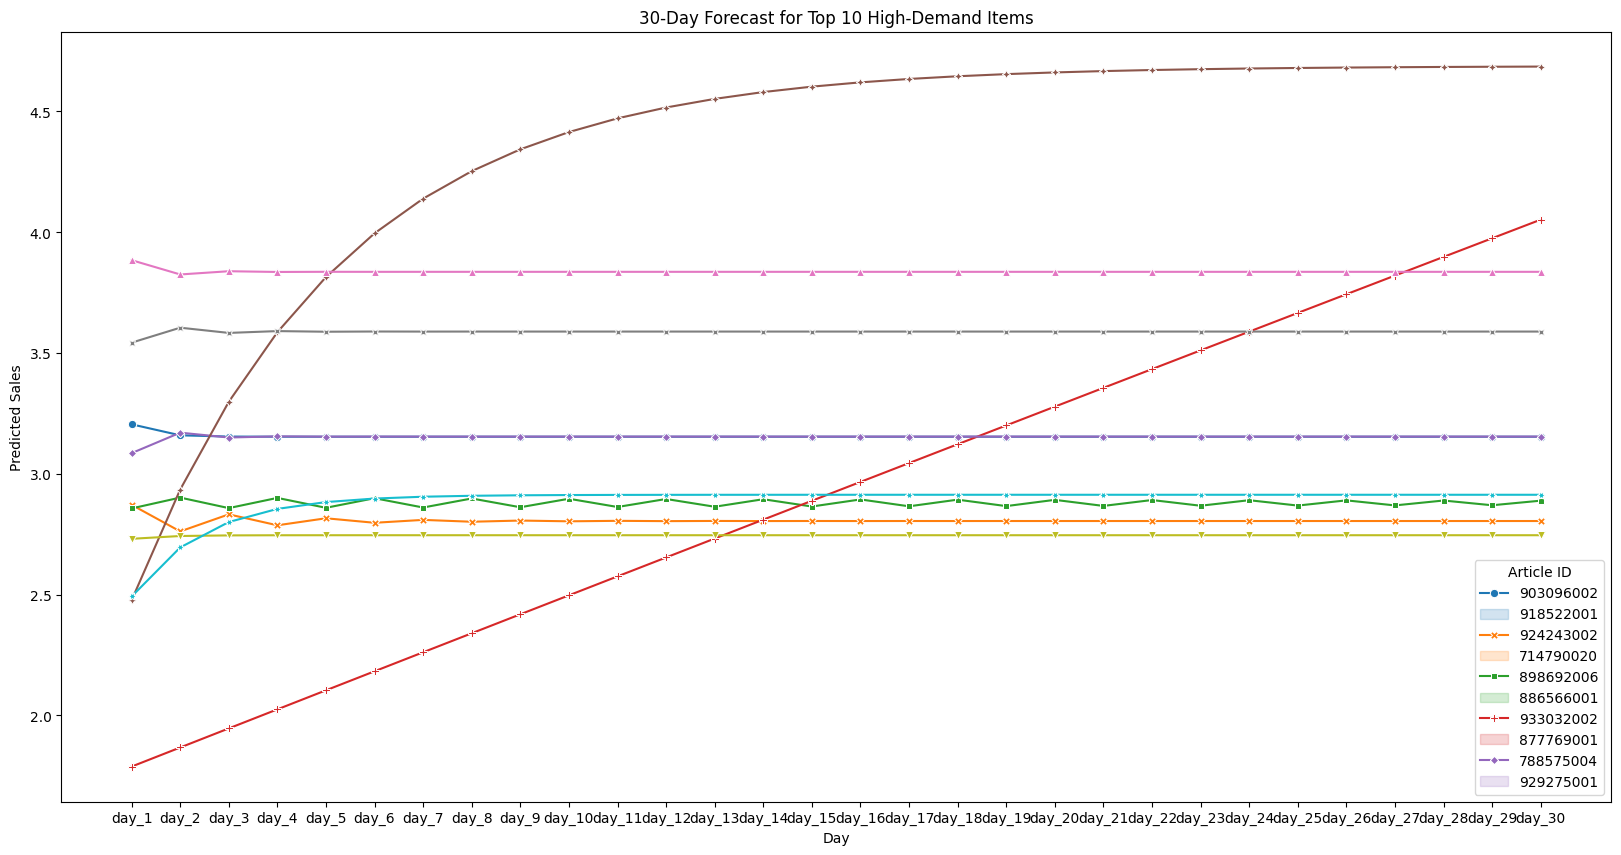

In [7]:
#TOP 5

# Calculate total forecast demand for each item over 30 days
predictions['total_forecast_demand'] = predictions.iloc[:, 1:].sum(axis=1)

# Get the top 5 high-demand items
top_5_items = predictions.nlargest(10, 'total_forecast_demand')

# Transpose data for plotting
top_5_forecast = top_5_items.set_index('article_id').iloc[:, :-1].T  # Exclude the 'total_forecast_demand' column

plt.figure(figsize=(20, 10))
sns.lineplot(data=top_5_forecast, markers=True, dashes=False)
plt.title("30-Day Forecast for Top 10 High-Demand Items")
plt.xlabel("Day")
plt.ylabel("Predicted Sales")
plt.legend(title="Article ID", labels=top_5_items['article_id'])
plt.show()


In [15]:
# Rename the "Unnamed: 0" column to "article_id"
#predictions.rename(columns={"Unnamed: 0": "article_id"}, inplace=True)

# Calculate the total forecast demand for each article over the 30 days
predictions['total_forecast_demand'] = predictions.iloc[:, 1:-1].sum(axis=1)

# Identify the 10 items with the highest total forecasted demand
top_10_items = predictions.nlargest(10, 'total_forecast_demand')

# Transpose the data for easier plotting with Seaborn
top_10_forecast = top_10_items.set_index('article_id').iloc[:, 1:-1].T  # Exclude 'total_forecast_demand' for plotting

# Display the prepared DataFrame for top 10 items with most positive predictions
top_10_forecast.head()

article_id,903096002,918522001,924243002,714790020,898692006,886566001,933032002,877769001,788575004,929275001
day_2,2.935036,3.825277,3.604939,3.159501,3.170453,1.867420,2.695419,2.901767,2.761771,2.742741
day_3,3.298309,3.838661,3.583353,3.154337,3.150437,1.946389,2.800551,2.858210,2.832353,2.745280
day_4,3.586313,3.835631,3.590884,3.153751,3.155166,2.025287,2.854986,2.900448,2.787096,2.745836
day_5,3.814646,3.836317,3.588257,3.153685,3.154049,2.104115,2.883170,2.859488,2.816114,2.745958
day_6,3.995669,3.836162,3.589173,3.153677,3.154313,2.182872,2.897764,2.899208,2.797508,2.745985


In [1]:
#HEATMAP OF ALL ITEMS - MAKES NO SENCE

import numpy as np

# Define the number of splits
num_splits = 240
split_dataframes = np.array_split(predictions, num_splits)  # Split the DataFrame into 6 parts

# Generate heatmaps for each sub-DataFrame
for i, df_chunk in enumerate(split_dataframes):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_chunk.iloc[:, 1:-1], cmap="YlGnBu", cbar_kws={'label': 'Predicted Sales'})
    plt.title(f"30-Day Forecast Heatmap for Chunk {i + 1}")
    plt.xlabel("Day")
    plt.ylabel("Article ID (Chunk)")
    plt.show()



NameError: name 'predictions' is not defined

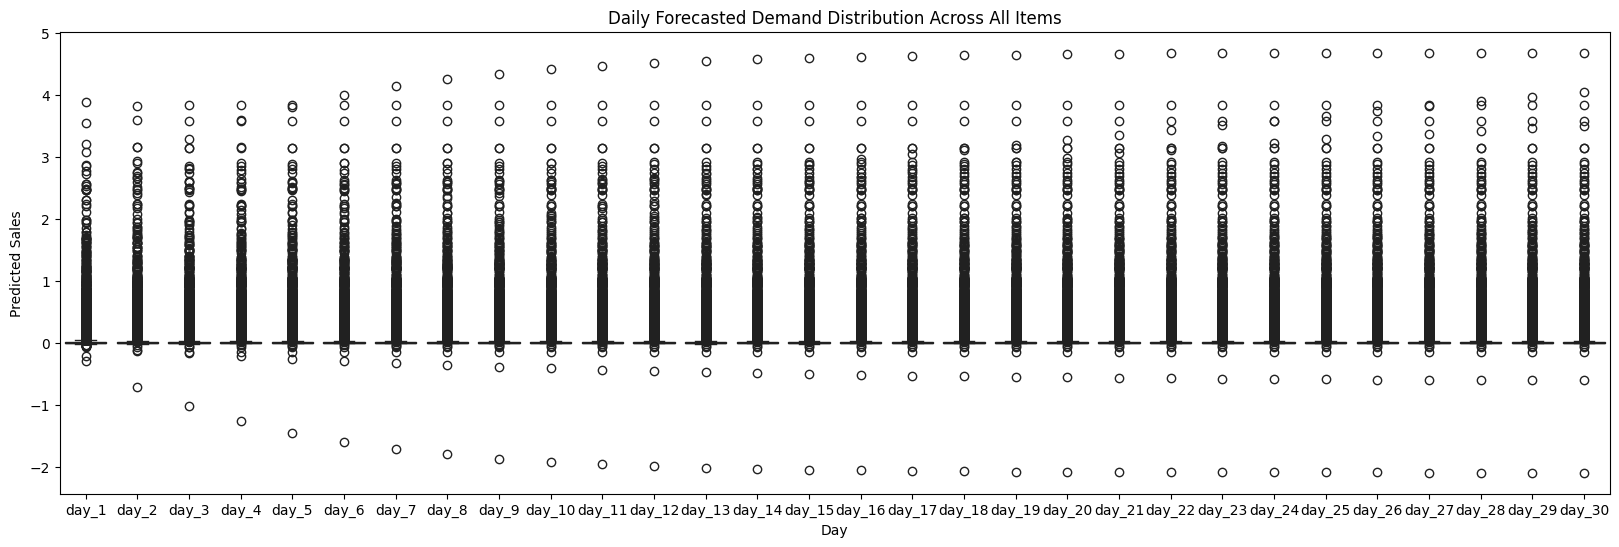

In [28]:
# Box Plot of Daily Demand Across All Items

plt.figure(figsize=(20, 6))
sns.boxplot(data=predictions.iloc[:, 1:-1], palette="viridis")
plt.title("Daily Forecasted Demand Distribution Across All Items")
plt.xlabel("Day")
plt.ylabel("Predicted Sales")
plt.show()


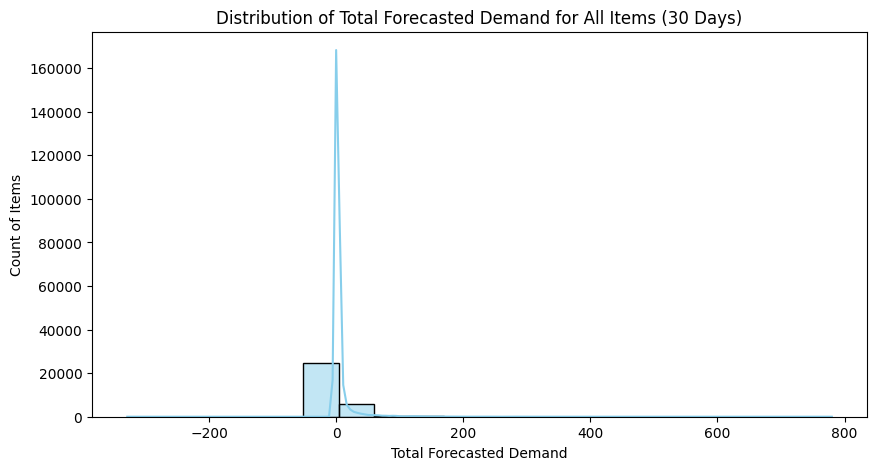

In [26]:
#Distribution of Total Demand for All Items

plt.figure(figsize=(10, 5))
sns.histplot(predictions['total_forecast_demand'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Total Forecasted Demand for All Items (30 Days)")
plt.xlabel("Total Forecasted Demand")
plt.ylabel("Count of Items")
plt.show()
